# BANK LOAN APPROVAL CLASSIFICATION PROJECT

###  Student Name : Lilian Kaburo
###  Student Pace : Hybrid
###  TM : Maryann Mwikali

# Business Understanding

## Introduction/Overview

In today's fast-paced financial world, banks and lenders face mounting pressure to make quick and accurate decisions about loan applications. The old-school method of manually evaluating loans, which relies heavily on human judgment and subjective criteria, tends to be slow, prone to mistakes, and inconsistent. To tackle these issues, many financial institutions are now embracing data-driven strategies, particularly machine learning, to streamline and improve the loan approval process.

The Bank Loan Approval Classification Project is designed to develop a machine learning model that predicts whether a loan application should be approved or rejected based on a set of features related to the applicant's financial history, personal information, and other relevant criteria. The objective is to build a classification model that can assist bank decision-makers by providing quick, objective, and accurate recommendations for loan approval.

## Stakeholders
1. Banks/ lending institution
2. Risk management department
3. Loan Officers/ Underwriting Team
4. Customers/ Loan Applicants
5. External Regulators (government agencies)

## Key Objectives


1. What is the main challenge of this project?---How can we create a predictive model to classify loan applications as either approved or denied?


2. What key factors should the model take into account when deciding on loan approvals?---How can we include various factors such as income, credit score, loan amount, and employment status into the model to mirror the bank’s decision-making process?


3. What data do we have available for training the model?---What features of the loan applicants (e.g., age, education level, credit history) are present in the dataset, and how do they correlate with loan approval status (approved or denied)?


4. How can machine learning techniques be applied to address this issue?---How can we utilize machine learning methods to develop a model that accurately predicts whether a new loan application will be approved or denied?


5. What is the main objective of this project?---How can we automate the loan approval decision-making process by developing a predictive model, and what level of accuracy is necessary for practical implementation?





# Data Understanding

 The Dataset we are using is obtained from https://www.kaggle.com/datasets/. The Bank loan approval dataset contains information about the loan Applicants that will be used to determine if they get approved for a new loan or not.
 
 we are going to use this dataset to;
 

1. Develop predictive models to classify loan applications as approved or denied.

2. Analyze key factors that influence loan approval decisions.

3. Improve the efficiency and accuracy of loan approval processes through data-driven insights.

We are going to use python pandas,numpy and other python libraries to explore and understand the data more.

## Importing Libraries

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [7]:
# load the dataset and display the first ten rows 
data=pd.read_csv('loan_data.csv', index_col=0)
data.head(10)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1


## Get the Summary of the dataframe

In [4]:
data.info() #checking datatypes and the rangeindex of the dataframe

<class 'pandas.core.frame.DataFrame'>
Float64Index: 45000 entries, 22.0 to 24.0
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_gender                   45000 non-null  object 
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                 

The Dataframe has 45,000 rows and 13 columns... some of which are numerical and others categorical

## Statistically Summarize the data

In [8]:
data.describe() #getting statistical information (descriptive statistics)

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Check for missing values

In [9]:
data.isnull().sum() # Checking  for missing values

person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## Check for Duplicates

In [12]:
duplicates = data.duplicated()
print(duplicates.sum())  # Prints the total number of duplicate rows


0


In [15]:
data.columns

Index(['person_gender', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

## Checking Data Distribution for numeric Variables

In [16]:


# Checking the distribution for numerical columns
numerical_columns = ['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']
for column in numerical_columns:
    print(f"Distribution for {column}:")
    print(data[column].describe())
    print("\n")




Distribution for person_income:
count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


Distribution for person_emp_exp:
count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


Distribution for loan_amnt:
count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


Distribution for loan_int_rate:
count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


Distribution for loan_

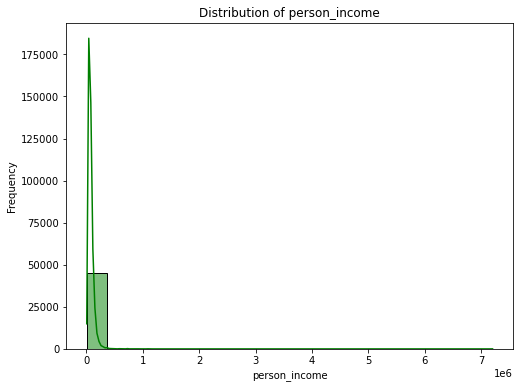

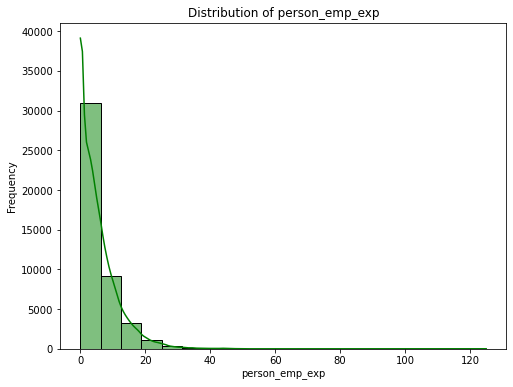

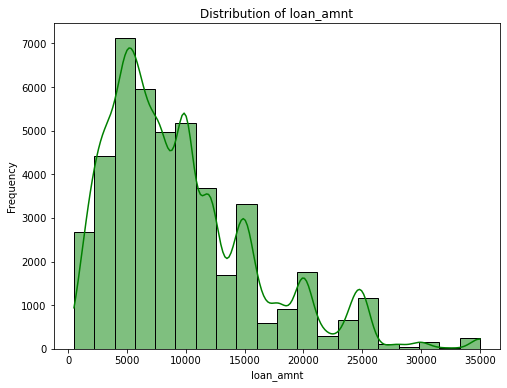

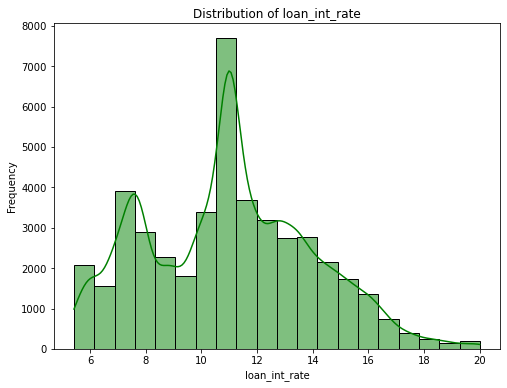

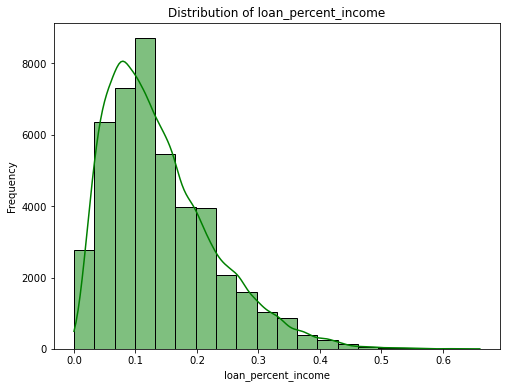

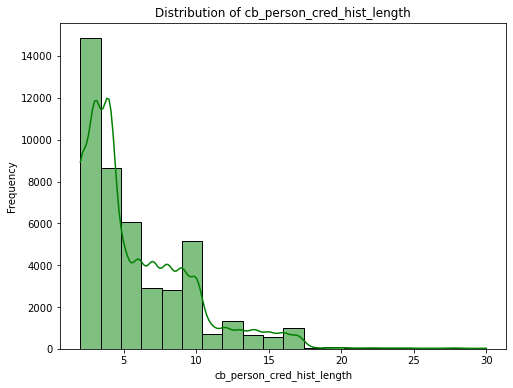

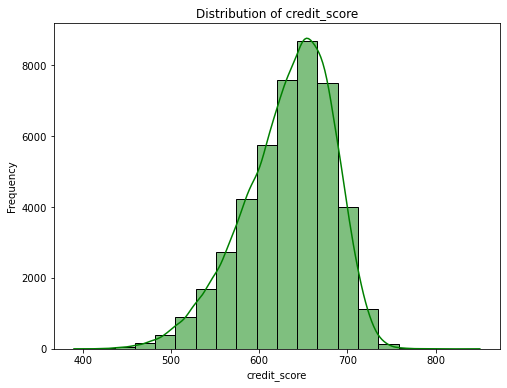

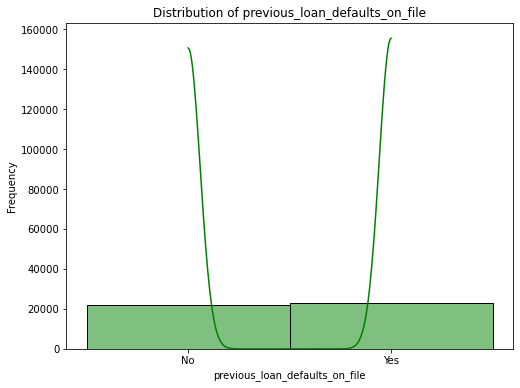

In [19]:


# Visualize the distributions for numerical columns with KDE
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  
    
    # Plot histogram
    sns.histplot(data[column], kde=True, bins=20, edgecolor='black', color= 'green')
    
    # Customize plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show plot
    plt.show()
